In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as nint
import sympy as sp
from jupyterthemes import jtplot
jtplot.style()

In [4]:
t, r, rs = sp.symbols('t r rs')
sc_metric = MetricSpace(
    coordinates=(t,r),
    params=(rs,),
    g=sp.Array([[(1 - rs/r),0],[0,-(1-rs/r)**(-1)]]),
    param_values = {rs: 1}
)

In [156]:
flat_metric = MetricSpace(coordinates=(t,r), params=(rs,), g=sp.Array([[1,0],[0,-1]]))
flat_gg = GeodesicGenerator(flat_metric)

In [5]:
dtb, dr, r, rs = sp.symbols('dtb dr r rs')
sp.collect(
    sp.expand(
    -(r-rs)/r * (dtb + dr) * (dtb - (r + rs)/(r - rs)*dr)
    ),dtb*dr
).coeff(dtb,2).simplify()

(-r + rs)/r

In [5]:
tb = sp.symbols('tb')
zee_metric = MetricSpace(
    coordinates=(tb,r),
    params=(rs,),
    g=-sp.Array([
        [(rs-r)/r,2*rs/r],
        [2*rs/r,(r+rs)/r]
    ]),
    param_values={rs: 1}
)

In [7]:
metric_space.normalize_tangent_vector(sc_metric.calc_ortho_tangent_vector(worldlines[0].tv[0], np.array([0,1])))

NameError: name 'x' is not defined

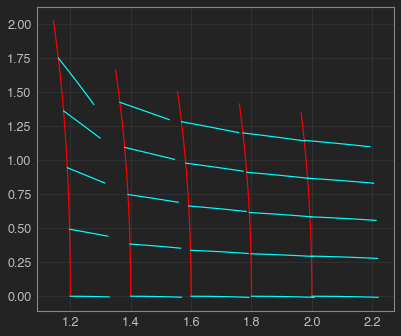

In [66]:
worldline_init_positions = [np.array([0,r0]) for r0 in np.linspace(1.2,2,5)]
metric_space = zee_metric
metric_gg = GeodesicGenerator(metric_space)
tangents = metric_space.calc_coordinate_tangents()
worldlines = [metric_gg.calc_geodesic(
                tv0=metric_space.get_coordinate_tangents_at_pos(x0)[0],
                t_span=(0,1), n_pts=20
                ) for x0 in worldline_init_positions
             ]

spacelines = [
    metric_gg.calc_geodesic(
        tv0=metric_space.normalize_tangent_vector(metric_space.calc_ortho_tangent_vector(tv, np.array([0,1]))),
        t_span=(0,0.3), n_pts=20
    ) for worldline in worldlines for tv in worldline.tv[::4]
]
for geo in worldlines:
    plt.plot(geo.x[:,1],geo.x[:,0],c='red')
for geo in spacelines:
    plt.plot(geo.x[:,1],geo.x[:,0],c='cyan')


In [27]:
len(worldlines[1].tau)

20

In [19]:
metric_space.get_coordinate_tangents_at_pos(x)

[TangentVector(x=array([0. , 1.1]), u=array([[3.31662479, 0.        ]])),
 TangentVector(x=array([0. , 1.1]), u=array([[0.        , 0.30151134]]))]

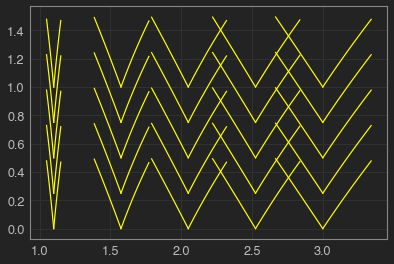

In [67]:
r0_vals = np.linspace(1.1,3,5)
t0_vals = np.linspace(0,1,5)
for t0 in t0_vals:
    for r0 in r0_vals:
        x = np.array([t0,r0])
        for u0 in [metric_space.calc_null_tangent(np.array([1,0]),np.array([0,s]),x) for s in (-1,1)]:
            
            geo = metric_gg.calc_geodesic(
                tv0=TangentVector(x=x, u=u0),
                t_span=(0,0.5), n_pts=20
                )
            plt.plot(geo.x[:,1],geo.x[:,0],c='yellow')
plt.gca().set_aspect(1)

In [11]:
np.array(zee_metric.g.subs({tb:0, r:1, rs:1}).tolist(),dtype=np.float)

array([[ 0., -2.],
       [-2., -2.]])

In [387]:
def test_dot(geo,i):
    return sc_metric.inner(geo.u[:,i],geo.u[:,i],geo.x[:,i],{rs: 1})
test_dot(geo,5)

-1.7445733746512815e-10

In [305]:
sol.y.shape

(4, 20)